In [ ]:
pip install pyppg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.7/193.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 kB 9.3 MB/s eta

In [ ]:
from pyPPG import PPG, Fiducials, Biomarkers
from pyPPG.datahandling import load_data, plot_fiducials, save_data
import pyPPG.preproc as PP
import pyPPG.fiducials as FP
import pyPPG.biomarkers as BM
import pyPPG.ppg_sqi as SQI

In [ ]:
import numpy as np
import sys
import json
import pandas as pd

In [ ]:
data_path="/content/Sample_PPG_MAT_125Hz.mat"

In [ ]:
start_sig = 0
end_sig = -1
savingfolder = 'temp_dir'
savingformat = 'csv'

In [ ]:
signal = load_data(data_path=data_path, start_sig=start_sig, end_sig=end_sig, use_tk=False)
signal.v = signal.v [0:20*signal.fs]

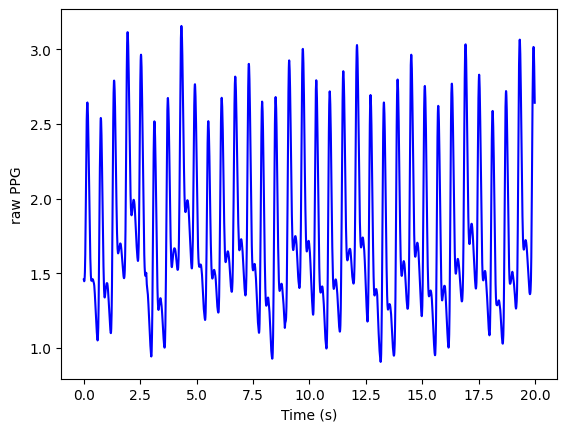

In [ ]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
t = np.arange(0, len(signal.v))/signal.fs
ax.plot(t, signal.v, color = 'blue')
ax.set(xlabel = 'Time (s)', ylabel = 'raw PPG')
plt.show()

In [ ]:
signal.filtering = True # whether or not to filter the PPG signal
signal.fL=0.5000001 # Lower cutoff frequency (Hz)
signal.fH=12 # Upper cutoff frequency (Hz)
signal.order=4
signal.sm_wins={'ppg':50,'vpg':10,'apg':10,'jpg':10}

prep = PP.Preprocess(fL=signal.fL, fH=signal.fH, order=signal.order, sm_wins=signal.sm_wins)
signal.ppg, signal.vpg, signal.apg, signal.jpg = prep.get_signals(s=signal)

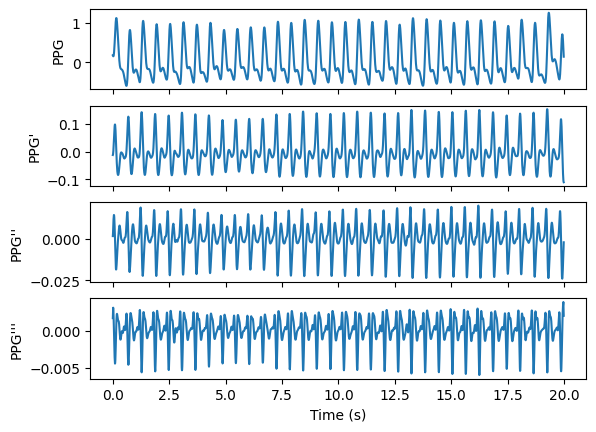

In [ ]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, 1, sharex = True, sharey = False)
t = np.arange(0, len(signal.ppg))/signal.fs

ax1.plot(t, signal.ppg)
ax1.set(xlabel = '', ylabel = 'PPG')

ax2.plot(t, signal.vpg)
ax2.set(xlabel = '', ylabel = 'PPG\'')


ax3.plot(t, signal.apg)
ax3.set(xlabel = '', ylabel = 'PPG\'\'')


ax4.plot(t, signal.jpg)
ax4.set(xlabel = 'Time (s)', ylabel = 'PPG\'\'\'')

plt.show()

In [ ]:
# Initialise the correction for fiducial points
corr_on = ['on', 'dn', 'dp', 'v', 'w', 'f']
correction=pd.DataFrame()
correction.loc[0, corr_on] = True
signal.correction=correction

# Create a PPG class
s = PPG(signal)

In [ ]:
fpex = FP.FpCollection(s=s)

In [ ]:
fiducials = fpex.get_fiducials(s=s)

In [ ]:
print("Fiducial points:\n",fiducials + s.start_sig) # here the starting sample is added so that the results are relative to the start of the original signal (rather than the start of the analysed segment)


Fiducial points:
                   on    sp    dn    dp   off     u     v     w     a     b  \
Index of pulse                                                               
0                  0    19    42    47    75    12    28    46     5    17   
1                 75    95   116   128   149    86   103   120    79    92   
2                149   168   194   198   223   159   176   195   153   165   
3                223   243   265   277   298   235   251   269   228   240   
4                298   318   341   346   372   309   326   342   303   315   
5                372   392   415   423   447   383   400   418   377   389   
6                447   466   490   498   520   457   475   492   451   463   
7                520   541   564   575   597   532   550   568   526   538   
8                597   616   640   649   670   608   625   643   601   614   
9                670   690   713   721   744   682   698   716   675   687   
10               744   764   788   797   819  

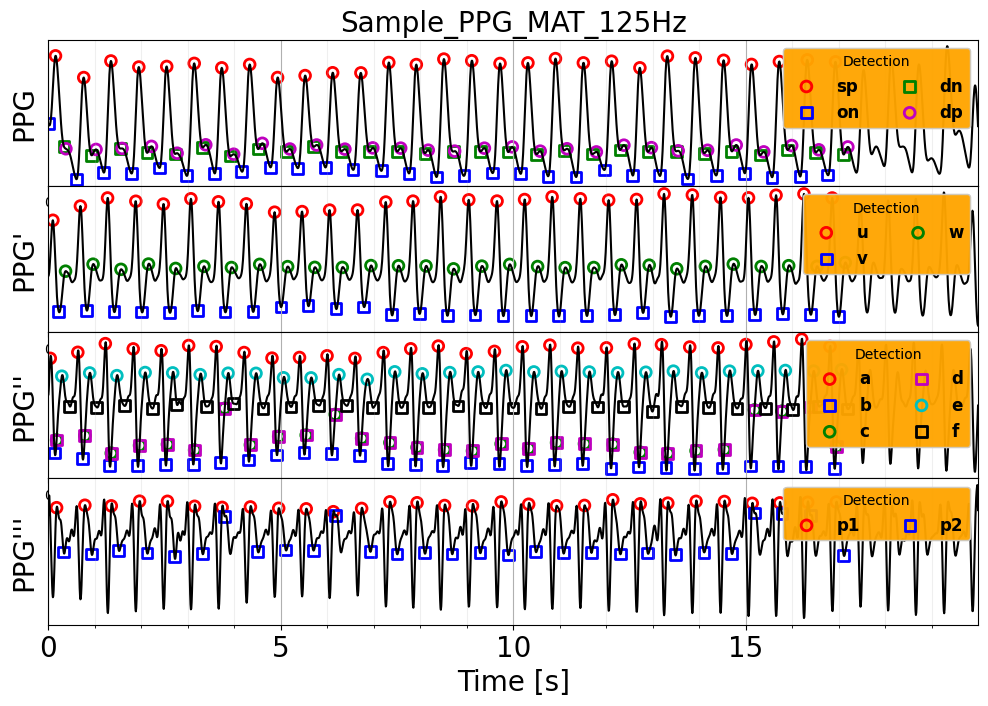

Figure has been saved in the "temp_dir/PPG_Figures/".


In [ ]:
# Create a fiducials class
fp = Fiducials(fp=fiducials)

# Plot fiducial points
plot_fiducials(s, fp, savingfolder, legend_fontsize=12)

In [ ]:
# Get PPG SQI
ppgSQI = round(np.mean(SQI.get_ppgSQI(ppg=s.ppg, fs=s.fs, annotation=fp.sp)) * 100, 2)
print('Mean PPG SQI: ', ppgSQI, '%')

Mean PPG SQI:  99.26 %


In [ ]:
# Init the biomarkers package
bmex = BM.BmCollection(s=s, fp=fp)

# Extract biomarkers
bm_defs, bm_vals, bm_stats = bmex.get_biomarkers()
tmp_keys=bm_stats.keys()
print('Statistics of the biomarkers:')
for i in tmp_keys: print(i,'\n',bm_stats[i])

# Create a biomarkers class
bm = Biomarkers(bm_defs=bm_defs, bm_vals=bm_vals, bm_stats=bm_stats)

no more peaks
no more peaks
no more peaks
no more peaks
Statistics of the biomarkers:
ppg_sig 
                     Tpi       Tpp      Tsys      Tdia       Tsp       Tdp  \
Statistics                                                                  
mean           0.598571  0.599143  0.345714  0.183714  0.159143  0.414857   
median         0.600000  0.600000  0.344000  0.180000  0.160000  0.416000   
std            0.010913  0.006534  0.010110  0.013435  0.005792  0.016660   
percentile_25  0.592000  0.592000  0.336000  0.176000  0.158000  0.406000   
percentile_75  0.608000  0.602000  0.354000  0.192000  0.160000  0.424000   
iqr            0.016000  0.010000  0.018000  0.016000  0.002000  0.018000   
skew           0.155789 -0.194138  0.123521  1.051691 -0.399652 -0.426608   
kurtosis      -0.742472 -0.717518 -1.100450  0.890221  0.140338 -0.498165   
mad            0.008959  0.005163  0.008490  0.010571  0.004143  0.013878   

                 deltaT     Tsw10         Tsw25         

In [ ]:
# Save PPG struct, fiducial points, biomarkers
fp_new = Fiducials(fp.get_fp() + s.start_sig) # here the starting sample is added so that the results are relative to the start of the original signal (rather than the start of the analysed segment)
save_data(s=s, fp=fp_new, bm=bm, savingformat=savingformat, savingfolder=savingfolder)

Results have been saved into the "temp_dir".


{'data_struct_mat': './temp_dir/PPG_struct/Sample_PPG_MAT_125Hz_data_btwn_0-15001.mat',
 'fiducials_csv': './temp_dir/Fiducial_points/Sample_PPG_MAT_125Hz_Fiducials_btwn_0-15001.csv',
 'ppg_sig_vals_csv': './temp_dir/Biomarker_vals/Sample_PPG_MAT_125Hz_ppg_sig_btwn_0-15001.csv',
 'ppg_sig_stats_csv': './temp_dir/Biomarker_stats/Sample_PPG_MAT_125Hz_ppg_sig_btwn_0-15001.csv',
 'ppg_sig_defs_csv': './temp_dir/Biomarker_defs/Sample_PPG_MAT_125Hz_ppg_sig_btwn_0-15001.csv',
 'sig_ratios_vals_csv': './temp_dir/Biomarker_vals/Sample_PPG_MAT_125Hz_sig_ratios_btwn_0-15001.csv',
 'sig_ratios_stats_csv': './temp_dir/Biomarker_stats/Sample_PPG_MAT_125Hz_sig_ratios_btwn_0-15001.csv',
 'sig_ratios_defs_csv': './temp_dir/Biomarker_defs/Sample_PPG_MAT_125Hz_sig_ratios_btwn_0-15001.csv',
 'ppg_derivs_vals_csv': './temp_dir/Biomarker_vals/Sample_PPG_MAT_125Hz_ppg_derivs_btwn_0-15001.csv',
 'ppg_derivs_stats_csv': './temp_dir/Biomarker_stats/Sample_PPG_MAT_125Hz_ppg_derivs_btwn_0-15001.csv',
 'ppg_derivs

In [ ]:
df=pd.read_csv("/content/temp_dir/Biomarker_vals/Sample_PPG_MAT_125Hz_ppg_sig_btwn_0-15001.csv")

In [ ]:
df.isnull().sum()

Index of pulse    0
TimeStamp         0
Tpi               0
Tpp               0
Tsys              0
Tdia              0
Tsp               0
Tdp               0
deltaT            0
Tsw10             0
Tsw25             0
Tsw33             0
Tsw50             0
Tsw66             0
Tsw75             0
Tsw90             0
Tdw10             0
Tdw25             0
Tdw33             0
Tdw50             0
Tdw66             0
Tdw75             0
Tdw90             0
Tpw10             0
Tpw25             0
Tpw33             0
Tpw50             0
Tpw66             0
Tpw75             0
Tpw90             0
Asp               0
Adn               0
Adp               0
Aoff              0
AUCpi             0
AUCsys            0
AUCdia            0
dtype: int64

In [ ]:
df['heart_rate'] = 60 /df['Tpi']


In [ ]:
columns=['Tpp','Tsys','deltaT','AUCpi','Tpi','Tdia']
X=df[columns]
y=df['heart_rate']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 0.3915979247632227
Mean Squared Error: 0.5342892515085168
R^2 Score: 0.7866789246327193
